In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import seaborn as sns
import pynbody as pb

# g8.26e11

In [2]:
s = pb.load('./data/g8.26e11/snap_2000/output/8.26e11.02000')
s.physical_units()
h = s.halos()

OSError: File './data/g8.26e11/snap_2000/output/8.26e11.02000': format not understood or does not exist

## Fe/H vs O/Fe

In [ ]:
#let's begin by centering it 
pb.analysis.angmom.faceon(h[1])

#create and apply the filter
disk_filt = pb.filt.LowPass('r', '100.00 kpc')
s_filt = s[disk_filt]

In [ ]:
feh = s_filt.s['feh']
ofe = s_filt.s['ofe']

In [ ]:
plt.hist2d(np.linalg.norm(s_filt.s['pos'], axis=1), s_filt.s['tform'], bins=1000)

In [ ]:
ofe_all = s.s['ofe']
ofe_all.max()

In [ ]:
plt.hist(ofe_all, bins='sqrt');

In [ ]:
sns.kdeplot(ofe_all)

# g7.55e11

In [3]:
s = pb.load('/mnt/storage/_data/nihao/nihao_classic/g7.55e11/g7.55e11.01024')
s.physical_units()
h = s.halos()
pb.analysis.angmom.faceon(h[1])

pynbody.halo : An error occurred while reading substructure file. Falling back to using the halo info.


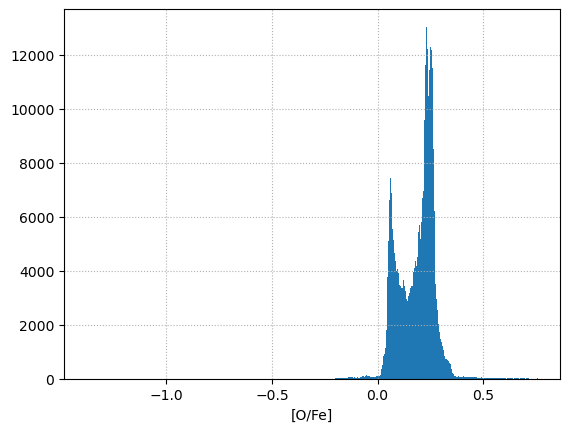

In [4]:
ofe_all = s.s['ofe']

plt.hist(ofe_all, 'sqrt')
plt.xlabel('[O/Fe]')
plt.grid(linestyle='dotted')

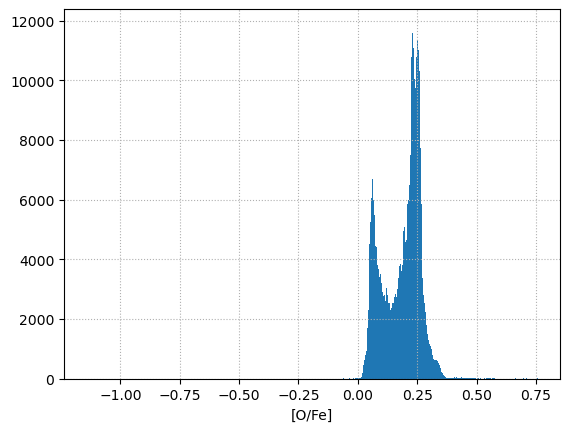

In [5]:
#create and apply the filter
disk_filt = pb.filt.LowPass('r', '30.00 kpc')
# disk_filt = pb.filt.BandPass('r', min='3.00 kpc', max='6.00 kpc')
# disk_filt = pb.filt.SolarNeighborhood(r1=f'{0.00} kpc', r2=f'{3.00} kpc', height=f'{5} kpc', cen=(0, 0, 0)) 
s_filt = s[disk_filt]

feh_disk = s_filt.s['feh']
ofe_disk = s_filt.s['ofe']

plt.hist(ofe_disk, 'sqrt')
plt.xlabel('[O/Fe]')
plt.grid(linestyle='dotted')

In [6]:
#let's take the 99.9 percentile 
percentile_feh = np.percentile(feh_disk, 0.01)
percentile_ofe = np.percentile(ofe_disk, 0.01)
print(percentile_feh)
print(percentile_ofe)

df = pd.DataFrame(data=(zip(feh_disk[feh_disk>percentile_feh], ofe_disk[ofe_disk>percentile_ofe])),
                  columns= ['Fe/H', 'O/Fe'])


-11.599135199727588
-0.15114149570465088


(-2.0, 0.5)

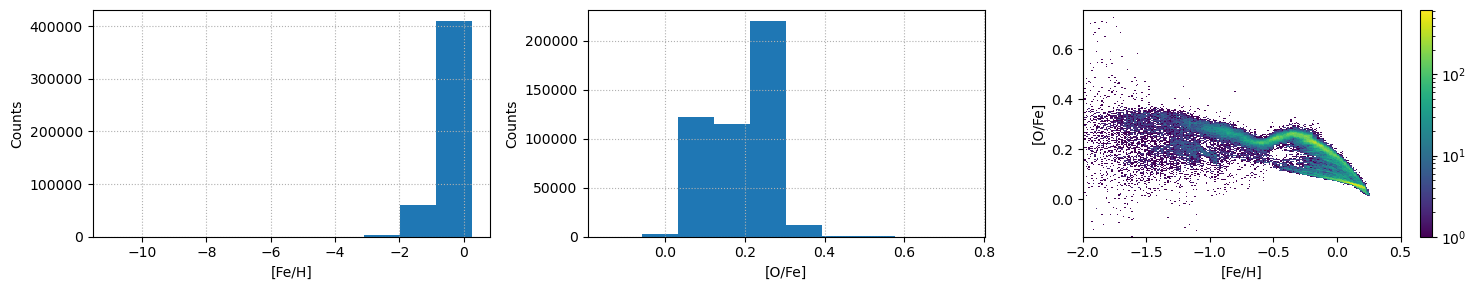

In [17]:
fig = plt.figure(figsize=(15, 3), layout='tight')
cmap = mpl.colormaps['viridis']

#plot the distribution of [Fe/H]
ax = fig.add_subplot(131)
ax.hist(df['Fe/H'])
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('Counts')
ax.grid(linestyle='dotted')

#plot the distribution of [O/Fe]
ax = fig.add_subplot(132)
ax.hist(df['O/Fe'])
ax.set_xlabel('[O/Fe]')
ax.set_ylabel('Counts')
ax.grid(linestyle='dotted')

#plot the distribtuion of [Fe/H] vs [O/Fe]
ax = fig.add_subplot(133)
cax = ax.hist2d(df['Fe/H'], df['O/Fe'], bins=(1000, 1000), norm=matplotlib.colors.LogNorm());
fig.colorbar(cax[3], ax=ax)
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[O/Fe]')
ax.set_xlim(-2, 0.5)

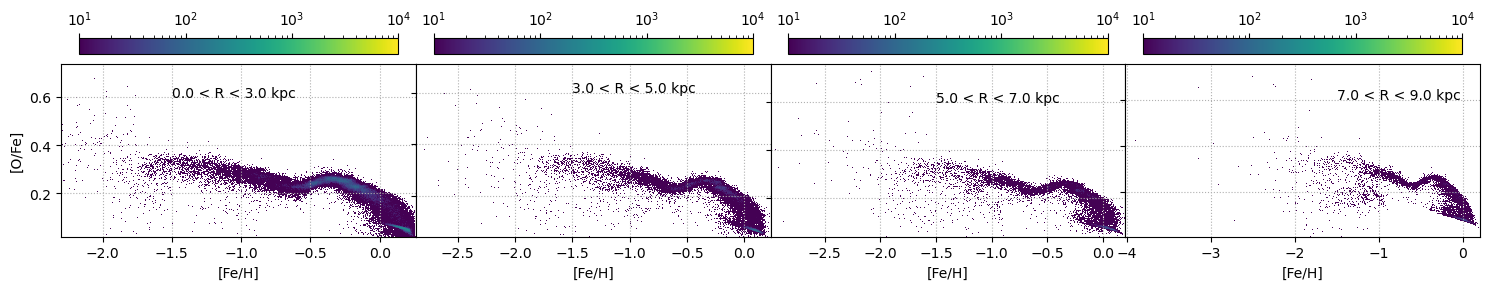

In [19]:
n_percentile = 0.1
r_interval = [[0.00, 3.00], [3.00, 5.00], [5.00, 7.00], [7.00, 9.00]]

gs = gridspec.GridSpec(1, len(r_interval), wspace=0)
fig = plt.figure(figsize=(15, 3), tight_layout=True)
cmap = plt.colormaps['magma']
norm = plt.cm.colors.LogNorm(vmin=1e1, vmax=1e4)

for i, r in enumerate(r_interval):
    disk_filt = pb.filt.SolarNeighborhood(r1=f'{r[0]} kpc', r2=f'{r[1]} kpc', height=f'{5} kpc', cen=(0, 0, 0)) 
    s_filt = s.s[disk_filt]

    feh = s_filt['feh']
    ofe = s_filt['ofe']

    feh_array = np.array(feh)
    ofe_array = np.array(ofe)
    #let's take the 99.9 percentile 
    percentile_feh = np.percentile(feh_array, n_percentile)
    percentile_ofe = np.percentile(ofe_array, n_percentile)

    #dataFrame for easy access
    df = pd.DataFrame(data=( zip(feh_array[feh_array>percentile_feh], ofe_array[ofe_array>percentile_ofe]) ), 
                      columns= ['Fe/H', 'O/Fe'])
    #plotting 
    # h = axs[i].hist2d(df['Fe/H'], df['O/Fe'], bins=(500, 500), norm=matplotlib.colors.LogNorm())
    ax = plt.subplot(gs[i])
    plt.hist2d(df['Fe/H'], df['O/Fe'], bins=(500, 500), norm=norm)
    plt.xlabel('[Fe/H]')
    plt.ylabel('[O/Fe]')
    if i != 0:
        plt.ylabel('')
        plt.tick_params(labelleft=False)
    cbar = plt.colorbar(location='top', shrink=0.90)
    cbar.ax.tick_params(labelsize=10)
    plt.grid(linestyle='dotted')
    plt.text(x = -1.5, y = 0.6, s=rf'{r[0]} < R < {r[1]} kpc')

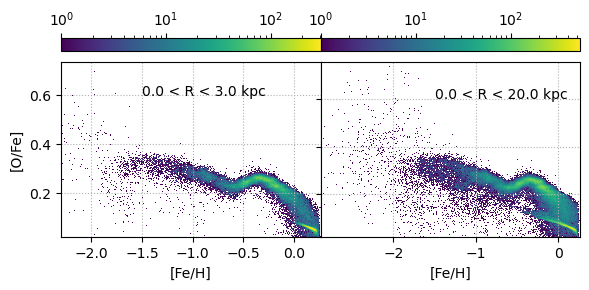

In [22]:
n_percentile = 0.1
r_interval = [[0.0, 3.0], [0.00, 20.00]]
# fig, axs = plt.subplots(1, len(r_interval), sharey=True, figsize=(15, 3))

gs = gridspec.GridSpec(1, len(r_interval), wspace=0)
fig = plt.figure(figsize=(6, 3), tight_layout=True)

for i, r in enumerate(r_interval):
    disk_filt = pb.filt.SolarNeighborhood(r1=f'{r[0]} kpc', r2=f'{r[1]} kpc', height=f'{5} kpc', cen=(0, 0, 0)) 
    s_filt = s.s[disk_filt]
    

    feh = s_filt['feh']
    ofe = s_filt['ofe']


    feh_array = np.array(feh)
    ofe_array = np.array(ofe)
    
    #let's take the 99.9 percentile 
    # percentile_star_mass = np.percentile(s_filstar_mass, n_percentile)
    percentile_feh = np.percentile(feh_array, n_percentile)
    percentile_ofe = np.percentile(ofe_array, n_percentile)

    #dataFrame for easy access
    df = pd.DataFrame(data=( zip(feh_array[feh_array>percentile_feh], ofe_array[ofe_array>percentile_ofe]) ), 
                      columns= ['Fe/H', 'O/Fe'])
    #plotting 
    ax = plt.subplot(gs[i])
    plt.hist2d(df['Fe/H'], df['O/Fe'], bins=(500, 500), norm=matplotlib.colors.LogNorm())
    plt.xlabel('[Fe/H]')
    plt.ylabel('[O/Fe]')
    if i != 0:
        plt.ylabel('')
        plt.tick_params(labelleft=False)
    plt.colorbar(location='top')
    plt.grid(linestyle='dotted')
    plt.text(x = -1.5, y = 0.6, s=rf'{r[0]} < R < {r[1]} kpc')